In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


In [ ]:
df = pd.read_csv('winequality-red.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
set(df.quality)

{3, 4, 5, 6, 7, 8}

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
x = df.drop(columns=['quality'])
y = df['quality']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=30)

In [ ]:
dt_model = DecisionTreeClassifier()

In [ ]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
import sklearn
import matplotlib.pyplot as plt


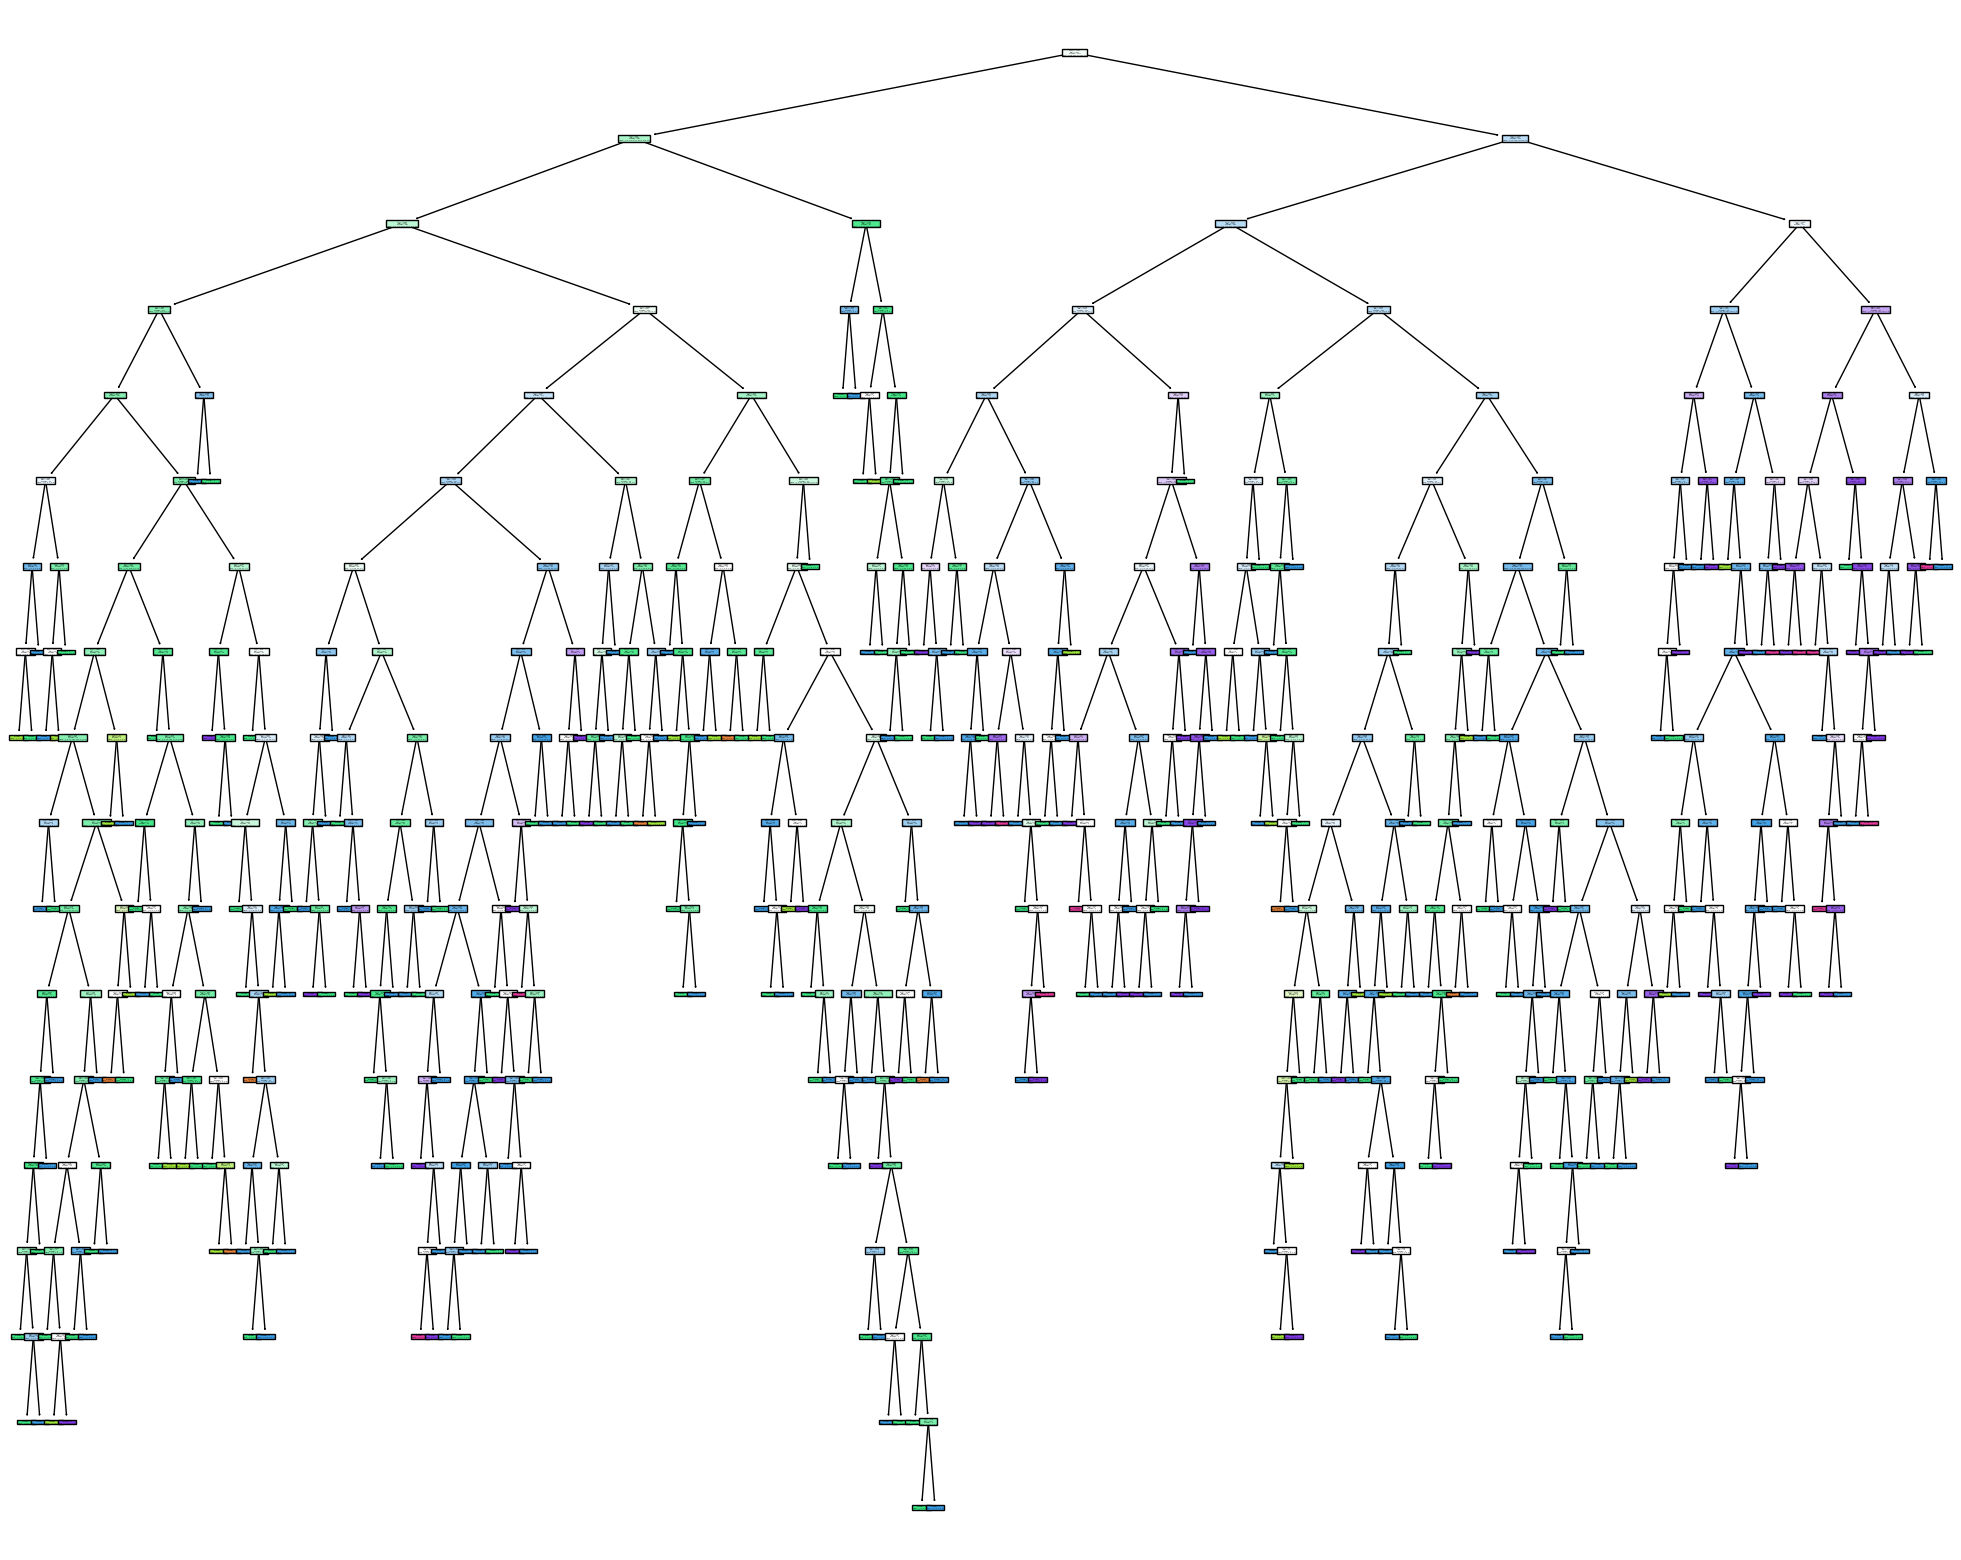

In [ ]:
plt.figure(figsize=(25,20))
tree.plot_tree(dt_model, filled=True)
plt.show()

In [ ]:
df1 = df.head(30)

In [ ]:
x1 = df1.drop(columns=['quality'])
y1 = df1['quality']

In [ ]:
dt_model1 = DecisionTreeClassifier()

In [ ]:

dt_model1.fit(x1,y1)

DecisionTreeClassifier()

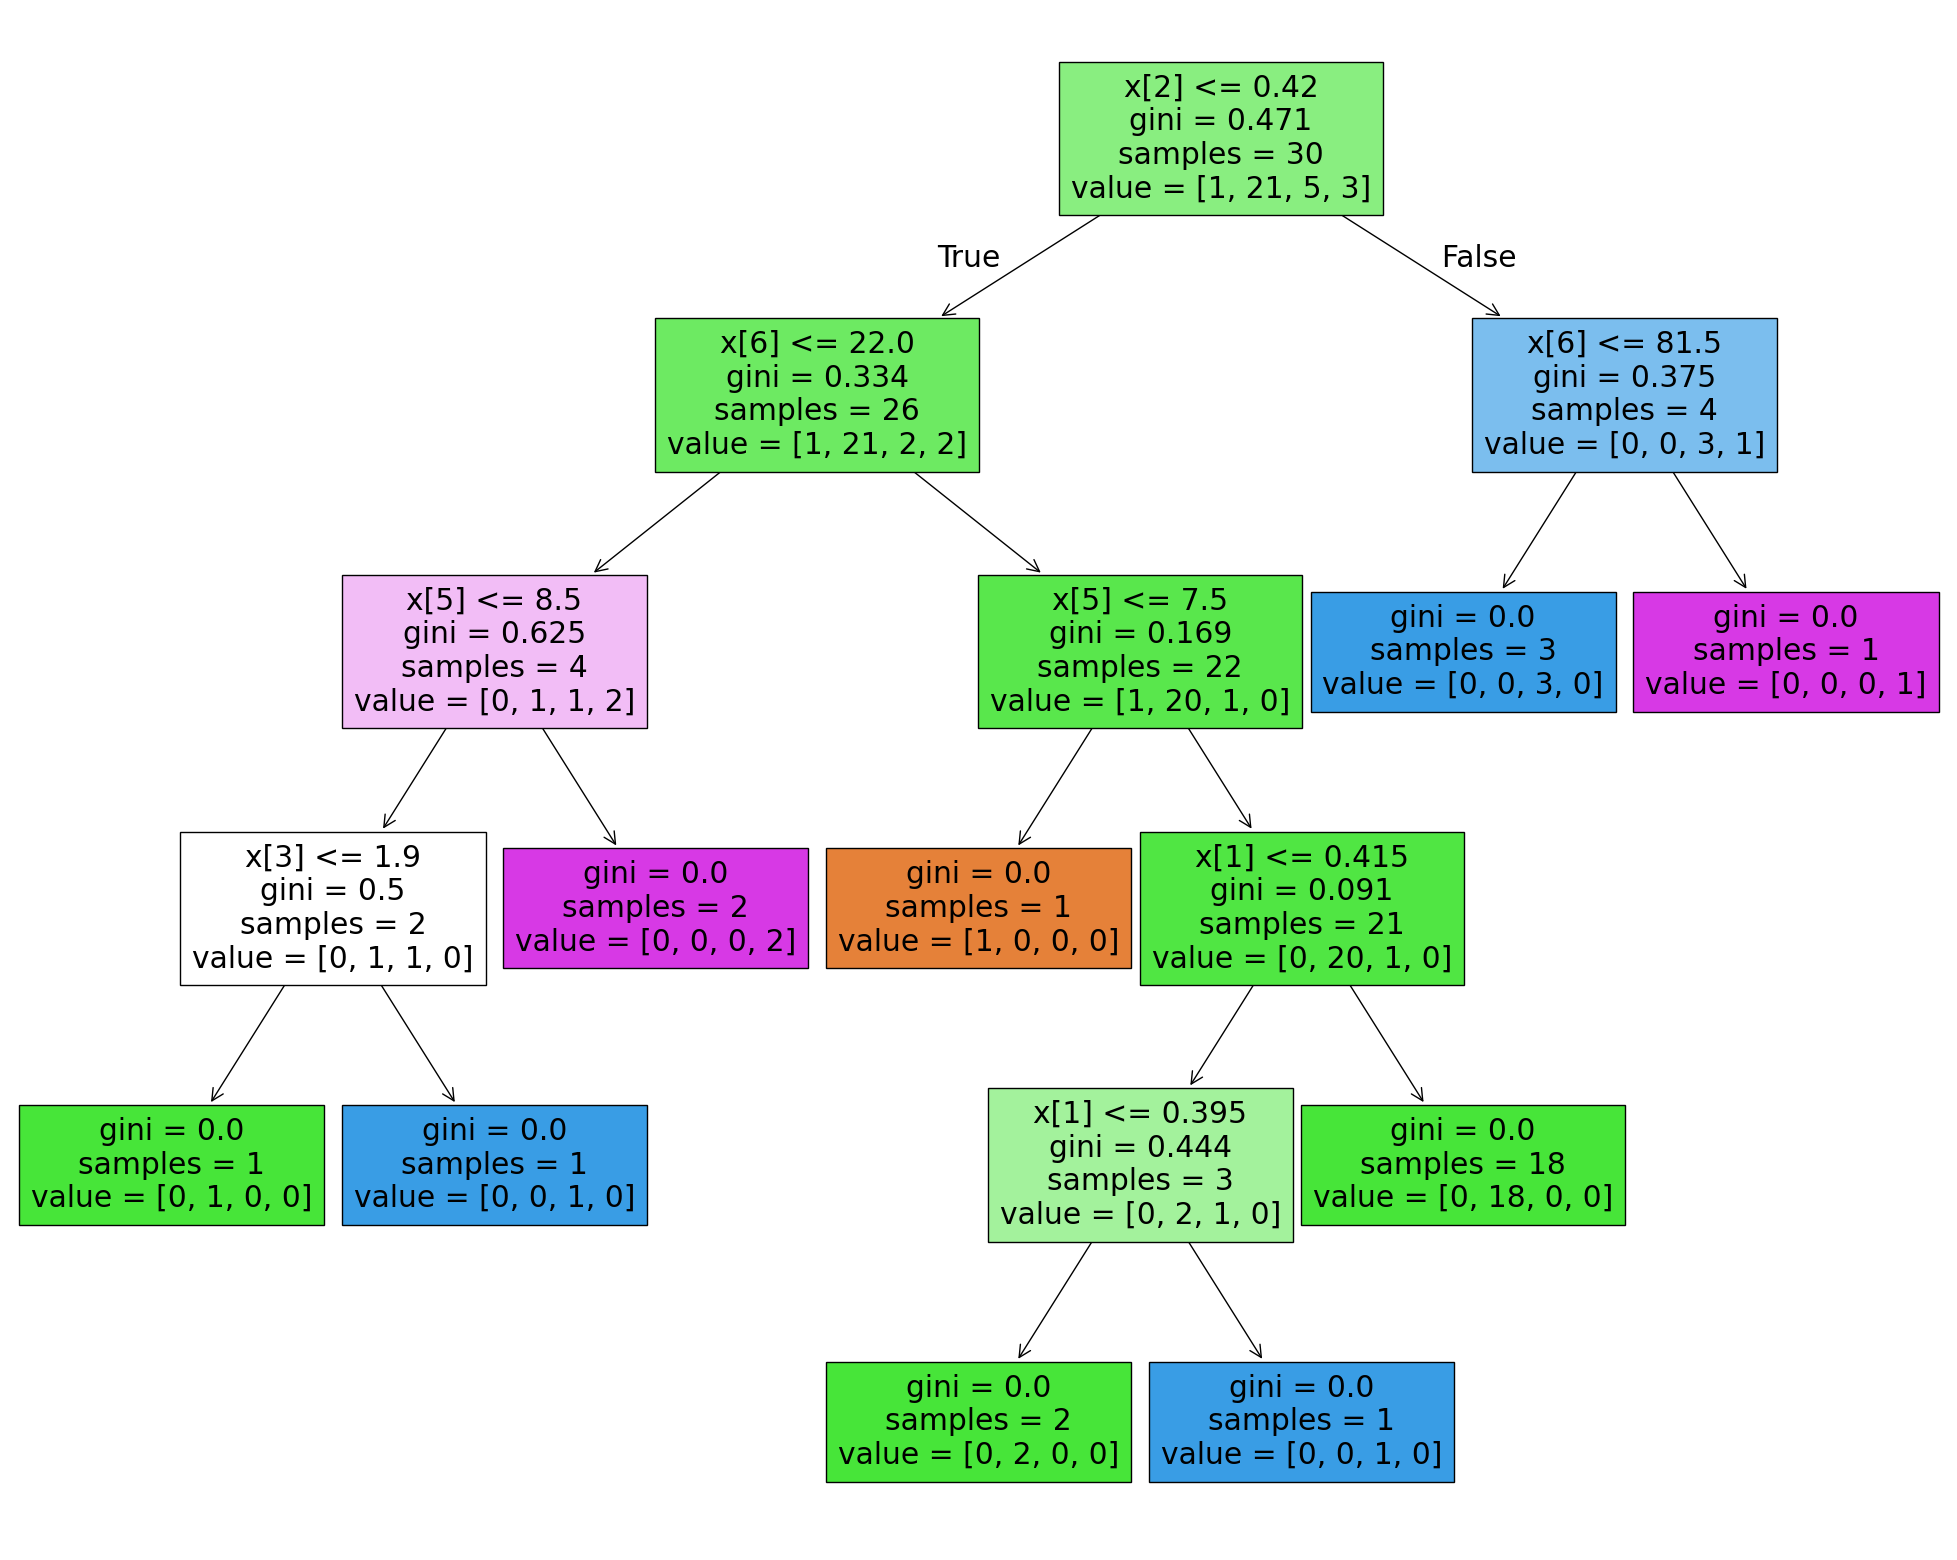

In [ ]:
plt.figure(figsize=(25,20))
tree.plot_tree(dt_model1, filled=True)
plt.show()

In [ ]:
dt_model.predict(x)

array([5, 5, 5, ..., 6, 5, 6])

In [ ]:
dt_model.score(x,y)

0.9049405878674172

In [ ]:
dt_model.score(x_test,y_test)

0.62

In [ ]:
path = dt_model.cost_complexity_pruning_path(x_train,y_train)

In [ ]:
ccp_alpha = path.ccp_alphas

In [ ]:
ccp_alpha

array([0.        , 0.00062552, 0.00069502, 0.00072977, 0.00074136,
       0.00076453, 0.00076731, 0.00077445, 0.00077445, 0.00078497,
       0.00079013, 0.00079013, 0.00079431, 0.00080067, 0.00080541,
       0.00081086, 0.00083403, 0.00083403, 0.00083403, 0.00083403,
       0.00083403, 0.00083403, 0.00083403, 0.00083403, 0.00083403,
       0.00083403, 0.00083403, 0.00083403, 0.00083403, 0.00083403,
       0.00083403, 0.00083403, 0.00083403, 0.00083403, 0.00083403,
       0.00083403, 0.00083403, 0.00083403, 0.00083403, 0.00104254,
       0.00104254, 0.00104254, 0.00111204, 0.00111204, 0.00111204,
       0.00111204, 0.00111204, 0.00111204, 0.00111204, 0.00111204,
       0.00115065, 0.00116476, 0.00117619, 0.00123641, 0.00125104,
       0.00125104, 0.00125104, 0.00125104, 0.00125104, 0.00125104,
       0.00125104, 0.00125104, 0.00125104, 0.00125104, 0.00125104,
       0.00125104, 0.00127822, 0.00129813, 0.00131062, 0.00131062,
       0.00132128, 0.00132205, 0.00133152, 0.00133445, 0.00133

In [ ]:
train_score = dt_model.score(x_test,y_test)

In [ ]:
train_score

0.62

In [ ]:
dt_model2 = []
for cpp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=cpp)
    dt_m.fit(x_train,y_train)
    dt_model2.append(dt_m)

In [ ]:
 dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.0006255212677231026),
 DecisionTreeClassifier(ccp_alpha=0.0006950236308034474),
 DecisionTreeClassifier(ccp_alpha=0.0007297748123436197),
 DecisionTreeClassifier(ccp_alpha=0.000741358539523677),
 DecisionTreeClassifier(ccp_alpha=0.0007645259938837922),
 DecisionTreeClassifier(ccp_alpha=0.0007673060884070058),
 DecisionTreeClassifier(ccp_alpha=0.0007744549028952701),
 DecisionTreeClassifier(ccp_alpha=0.0007744549028952701),
 DecisionTreeClassifier(ccp_alpha=0.0007849678653780112),
 DecisionTreeClassifier(ccp_alpha=0.0007901321276502352),
 DecisionTreeClassifier(ccp_alpha=0.0007901321276502352),
 DecisionTreeClassifier(ccp_alpha=0.0007943127209182258),
 DecisionTreeClassifier(ccp_alpha=0.0008006672226855711),
 DecisionTreeClassifier(ccp_alpha=0.0008054097368722303),
 DecisionTreeClassifier(ccp_alpha=0.0008108609026040222),
 DecisionTreeClassifier(ccp_alpha=0.0008340283569641367),
 DecisionTreeClassifier(ccp_alpha=0.0008340283

In [ ]:
train_score = [i.score(x_train,y_train) for i in dt_model2]

In [ ]:
test_score = [i.score(x_test,y_test) for i in dt_model2]

In [ ]:
test_score

[0.6325,
 0.6125,
 0.625,
 0.61,
 0.63,
 0.6275,
 0.635,
 0.6225,
 0.62,
 0.6375,
 0.6275,
 0.61,
 0.62,
 0.605,
 0.62,
 0.6325,
 0.6125,
 0.6175,
 0.625,
 0.645,
 0.635,
 0.625,
 0.6175,
 0.6175,
 0.6375,
 0.6225,
 0.6225,
 0.6275,
 0.62,
 0.6275,
 0.6375,
 0.6275,
 0.63,
 0.6275,
 0.6275,
 0.615,
 0.6375,
 0.625,
 0.63,
 0.6275,
 0.62,
 0.625,
 0.62,
 0.615,
 0.63,
 0.63,
 0.6375,
 0.6325,
 0.625,
 0.615,
 0.625,
 0.6175,
 0.6175,
 0.625,
 0.615,
 0.63,
 0.6025,
 0.6175,
 0.6175,
 0.6375,
 0.6175,
 0.6225,
 0.625,
 0.6125,
 0.6175,
 0.6175,
 0.6175,
 0.615,
 0.6175,
 0.61,
 0.62,
 0.6125,
 0.62,
 0.6175,
 0.6175,
 0.62,
 0.6075,
 0.63,
 0.6275,
 0.6225,
 0.6275,
 0.63,
 0.605,
 0.6275,
 0.6225,
 0.6175,
 0.63,
 0.6275,
 0.63,
 0.6275,
 0.625,
 0.6125,
 0.62,
 0.6125,
 0.64,
 0.6225,
 0.63,
 0.625,
 0.63,
 0.63,
 0.625,
 0.6275,
 0.625,
 0.6225,
 0.6325,
 0.6325,
 0.6275,
 0.6375,
 0.63,
 0.6325,
 0.6375,
 0.635,
 0.635,
 0.635,
 0.635,
 0.6375,
 0.645,
 0.6375,
 0.6425,
 0.635,
 0.64

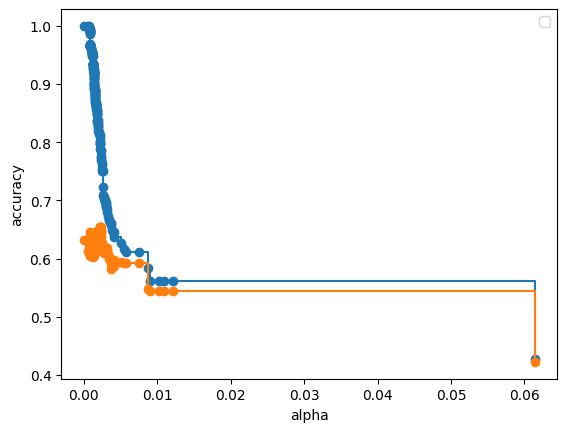

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.plot(ccp_alpha, train_score, marker = 'o', drawstyle='steps-post')
ax.plot(ccp_alpha, test_score, marker = 'o', drawstyle='steps-post')
ax.legend()
plt.show()


In [ ]:
dt_model_ccp = DecisionTreeClassifier(ccp_alpha=0.008)

In [ ]:
dt_model_ccp.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.008)

In [ ]:
dt_model_ccp.score(x_train,y_train)

0.6113427856547122

In [ ]:
dt_model_ccp.score(x_test,y_test)

0.5925

In [ ]:
grid_pram = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':range(2,40,1),
    'min_samples_leaf':range(2,10,1),
    'min_samples_split':range(1,10,1),
}


In [ ]:
grid_ccp = GridSearchCV(estimator = dt_model_ccp,param_grid = grid_pram, cv=5)

In [ ]:
grid_ccp.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6080 fits failed out of a total of 54720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(ccp_alpha=0.008),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']})

In [ ]:
dt_cpp_new = DecisionTreeClassifier(ccp_alpha=0.008, criterion='entropy', max_depth=36,
                       min_samples_leaf=7, min_samples_split=4,
                       splitter='random')

In [ ]:
dt_cpp_new.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.008, criterion='entropy', max_depth=36,
                       min_samples_leaf=7, min_samples_split=4,
                       splitter='random')

In [ ]:
dt_cpp_new.score(x_train,y_train)

0.6055045871559633

In [ ]:
dt_cpp_new.score(x_test,y_test)

0.565